<a href="https://colab.research.google.com/github/minhaz1172/Deep-Learning/blob/main/Data_Augmentation_and_training_augmented_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We wiil use CIFAR-10 dataset (a popular image dataset for classification) to demonstrate data augmentation. We create a simple convolutional neural network (CNN) to classify the images, using augmented data during training

# **import necessary Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


# **lOAD tHE DATASET cifar-10**

In [2]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# **Image normalization**

In [3]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

# Convert the class labels  to one hot encoded vectors for multiclass classification

In [4]:
y_train_cat=to_categorical(y_train,10) ## 10 classes in CIFAR-10
y_test_cat=to_categorical(y_test,10)


# Visualize sample image from the training data

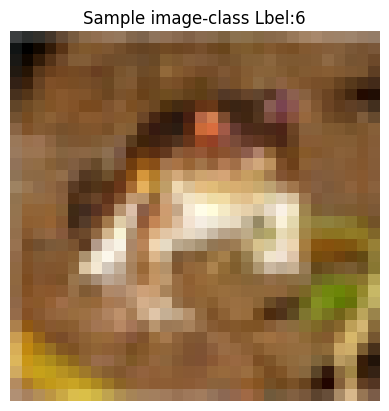

In [8]:
plt.imshow(X_train[0])
plt.title(f"Sample image-class Lbel:{y_train[0][0]}")
plt.axis('off')# Hide the axis to focus on the image
plt.show()

#